In [ ]:
import warnings
 
# 경고 메시지 출력 안함  
warnings.filterwarnings("ignore")

## 1. 문제 정의

## 2. 데이터 수집

### 보스턴 집값 데이터

In [ ]:
from sklearn.datasets import load_boston

# 딕셔너리 타입으로 저장
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
# 딕셔너리로 된 데이터를 데이터프레임으로 변경 (X, Y를 한번에 보기)
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# target도 데이터프레임으로 변경
y = pd.DataFrame(data.target, columns=["Price"])
y.head(5)

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
# X, y 를 병합 (axis=1 : 가로축 방향으로 병합)
data2 = pd.concat([X, y], axis=1)
data2.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 광고대비매출 데이터 셋

In [ ]:
import pandas as pd

data2 = pd.read_csv("Advertising.csv")
data2.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
import pandas as pd

X = data2.iloc[:, :-1]
Y = data2.iloc[:, -1]

In [ ]:
X.head(5)

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [ ]:
Y.head(5)

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### wine 데이터 셋

In [ ]:
import pandas as pd

data = pd.read_csv("wine.csv", header=None)
data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## 3. EDA (탐색적 데이터분석)

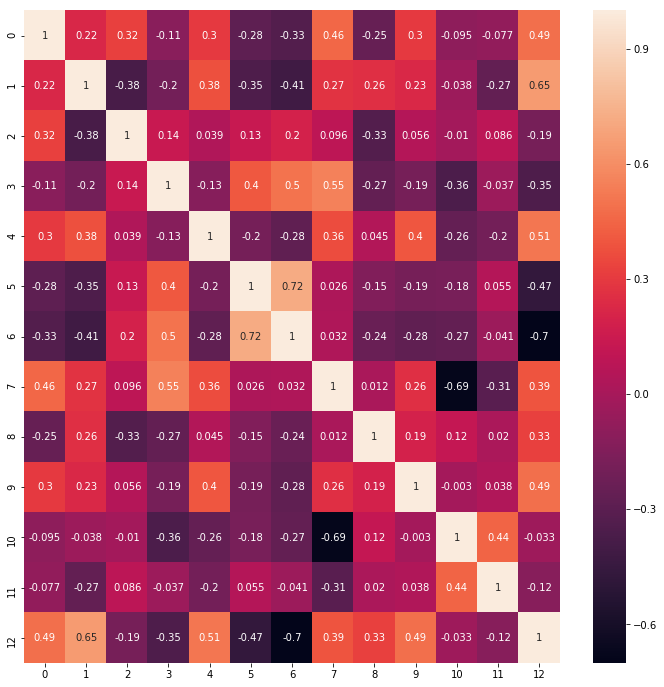

In [ ]:
# heatmap : 각 feature들과 label 들 간의 상관관계를 표시하는 그래프
import seaborn as sb
import matplotlib.pyplot as plt

# 그래프의 크기
plt.figure(figsize=(12,12))
# corr() : 상관관계를 분석
# annot=True : 히트맵 위에 숫자 값 (상관도)을 표시
sb.heatmap(data.corr(), annot=True)

In [ ]:
# 알콜 도수를 Y로 설정 (10번)
Y = data.iloc[:,10]
Y.head(5)

0    9.4
1    9.8
2    9.8
3    9.8
4    9.4
Name: 10, dtype: float64

In [ ]:
del data[10] 

In [ ]:
X = data
X.head(5)

,0,1,2,3,4,5,6,7,8,9,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,1


In [ ]:
# 결측치 확인
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [ ]:
# 이상치 (outier) : 크게 값 범위에 벗어나는 값
data2.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## 4. 데이터 전처리 / 특성공학

In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(
         data.data, data.target, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(
         X, Y, random_state=0)

In [ ]:
# 오차를 계산 (RMSE)
def mse(pred, y):
    temp = 0
    
    for i in range(len(y)):
        # 오차 제곱의 합
        temp += ((pred[i]-y[i])**2)
    # 평균 제곱근 오차 반환
    return np.sqrt(temp / len(y))

## 5. 회귀 모델 선택 -> 모델 학습


### KNN 회귀

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model_knnreg = KNeighborsRegressor(n_neighbors=3)
model_knnreg.fit(trainX, trainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

### 선형 회귀

In [ ]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression().fit(trainX, trainY)

### Ridge
- feature수가 작고 값 범위 차이가 큰 경우 큰 값은 작게, 작은 값은 크게하여 학습
- L2 규제를 사용 (alpha 값 조정)

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha=0.1)
model_ridge.fit(trainX,trainY)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Lasso
- feature 수가 많아서 상관관계가 적은 feature를 제거하고 학습
- L1 규제를 사용 (alpha 값 조정)
- 규제를 강하게 하면 과소적합, 약하게 하면 과대적합 가능성 높아짐

In [ ]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha=0.1)
model_lasso.fit(trainX, trainY)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=3, random_state=0)
model_dt.fit(trainX, trainY)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, max_depth=3,
                                random_state=0)
model_rf.fit(trainX, trainY)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

### SVR

In [ ]:
from sklearn.svm import LinearSVR

model_svr = LinearSVR(C=0.1, random_state=0)
model_svr.fit(trainX, trainY)

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=0.1, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=0, tol=0.0001, verbose=0)

### GBM

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_gbr = GradientBoostingRegressor(random_state=0)
model_gbr.fit(trainX, trainY)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

### XtraTree

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

model_ext = ExtraTreesRegressor(random_state=0, n_estimators=5)

model_ext.fit(X_train, Y_train)

### XGboost

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xb
from xgboost.sklearn import XGBRegressor

model_xgb = XGBRegressor(learning_rate=0.1, n_estimators=500, 
                         max_depth=2, gamma=0)
model_xgb.fit(trainX, trainY)

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:46:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

## MLP

In [ ]:
from sklearn.neural_network import MLPRegressor

model_mlp = MLPRegressor(random_state=0)

model_mlp.fit(X_train, Y_train)

## 6. 모델 평가
- 정밀도(R^2) : 평균 모델과 비교하여 얼마나 유사한지를 평가하는 모델

In [ ]:
# KNN
from sklearn.metrics import mean_squared_error
import numpy as np

knnreg_pred = model_knnreg.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(knnreg_pred, testY)))
print("정밀도(R^2) : ", model_knnreg.score(testX, testY))

오차 :  1.0490906002626055
정밀도(R^2) :  0.24075898711983967


In [ ]:
# 선형회귀
from sklearn.metrics import mean_squared_error
import numpy as np

lr_pred = model_lr.predict(testX)
print("오차 : ",  np.sqrt(mean_squared_error(lr_pred, testY)))
print("정밀도(R^2) : ", model_lr.score(testX, testY))

오차 :  0.6127475045047026
정밀도(R^2) :  0.7409898575912444


In [ ]:
# Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

ridge_pred = model_ridge.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(ridge_pred, testY)))
print("정밀도(R^2) : ", model_ridge.score(testX, testY))

오차 :  0.8890681468431082
정밀도(R^2) :  0.45471472524765416


In [ ]:
# Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

lasso_pred = model_lasso.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(lasso_pred, testY)))
print("정밀도(R^2) : ", model_lasso.score(testX, testY))

오차 :  1.0056018758284806
정밀도(R^2) :  0.3024010506111008


In [ ]:
# 의사결정트리
from sklearn.metrics import mean_squared_error
import numpy as np

dt_pred = model_dt.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(dt_pred, testY)))
print("정밀도(R^2) : ", model_dt.score(testX, testY))

오차 :  0.7649392916609722
정밀도(R^2) :  0.5963475368612114


In [ ]:
# Random Forest
from sklearn.metrics import mean_squared_error
import numpy as np

rf_pred = model_rf.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(rf_pred, testY)))
print("정밀도(R^2) : ", model_rf.score(testX, testY))

오차 :  0.7303865091971863
정밀도(R^2) :  0.6319903949152343


In [ ]:
# SVR
from sklearn.metrics import mean_squared_error
import numpy as np

svr_pred = model_svr.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(svr_pred, testY)))
print("정밀도(R^2) : ", model_svr.score(testX, testY))

오차 :  1.0107646847979828
정밀도(R^2) :  0.2952196490685406


In [ ]:
# Gradientboost
from sklearn.metrics import mean_squared_error
import numpy as np

gbc_pred = model_gbc.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(gbc_pred, testY)))
print("정밀도(R^2) : ", model_gbc.score(testX, testY))

오차 :  0.4787436642244984
정밀도(R^2) :  0.84188985125879


In [ ]:
# XtraTree
from sklearn.metrics import mean_squared_error
import numpy as np

ext_pred = model_ext.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(ext_pred, testY)))
print("정밀도(R^2) : ", model_ext.score(testX, testY))

In [ ]:
# XGBoost
from sklearn.metrics import mean_squared_error
import numpy as np

xgb_pred = model_xgb.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(xgb_pred, testY)))
print("정밀도(R^2) : ", model_xgb.score(testX, testY))

In [ ]:
# MLP
from sklearn.metrics import mean_squared_error
import numpy as np

mlp_pred = model_gbc.predict(testX)
print("오차 : ", np.sqrt(mean_squared_error(mlp_pred, testY)))
print("정밀도(R^2) : ", model_mlp.score(testX, testY))

## 7. 모델 개선

## 8. 예측

In [ ]:
data3 = testX[1:2, :]
print("실제 값 : ", testY[1])
print("knn 예측 : ", model_knnreg.predict(data3))
print("선형회귀 예측 : ", model_lr.predict(data3))
print("Ridge 예측 : ", model_ridge.predict(data3))
print("Lasso 예측 : ", model_lasso.predict(data3))

실제 값 :  50.0
knn 예측 :  [39.26666667]
선형회귀 예측 :  [23.61699724]
Ridge 예측 :  [23.54032447]
Lasso 예측 :  [22.96975758]
